# ========================================================================================
# 2m_project_3
# ========================================================================================

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 
Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
user_data = pd.read_csv(r'F:\!PR\Simulation\data\3_user_data.csv')

In [3]:
logs = pd.read_csv(r'F:\!PR\Simulation\data\3_logs.csv')

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [7]:
logs.info()
logs.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


,client,success,platform,time
count,4500.000000,4500,4500,4.500000e+03
unique,NaN,2,3,NaN
top,NaN,True,phone,NaN
freq,NaN,3289,2753,NaN
mean,50998.758000,NaN,NaN,1.585440e+09
std,28374.472495,NaN,NaN,2.314866e+04
min,40.000000,NaN,NaN,1.585400e+09
25%,27056.500000,NaN,NaN,1.585420e+09
50%,52659.000000,NaN,NaN,1.585440e+09
75%,76001.250000,NaN,NaN,1.585461e+09


Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:
12, 123, 456

In [9]:
success_counts = logs.loc[logs.success].client.value_counts()
success_counts

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [13]:
max_num = success_counts.max()
max_num

np.int64(41)

In [11]:
max_success_users = success_counts.loc[success_counts == max_num]

In [12]:
max_success_users.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

С какой платформы осуществляется наибольшее количество успешных операций?

In [14]:
logs.loc[logs.success].platform.value_counts().idxmax()

'phone'

Какая платформа наиболее популярна среди премиумных клиентов?

In [15]:
full_ds = logs.merge(user_data, on = 'client')

In [16]:
full_ds.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33


In [17]:
full_ds.loc[full_ds.premium].platform.value_counts().idxmax()

'phone'

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (обычный или премиум), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате? Используйте датасет, который вы получили на предыдущем шаге.

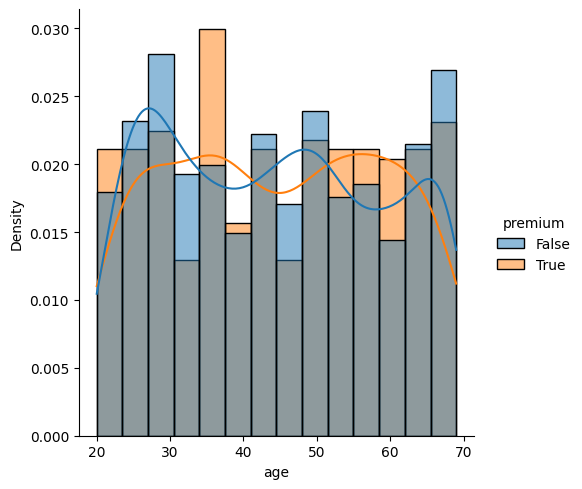

In [46]:
sns.displot(data = full_ds, x='age', hue='premium', kde= True, kind='hist', stat='density', common_norm=False, bins=14)

Постройте график распределения числа успешных операций: 
•	x – число успешных операций
•	y – число клиентов, совершивших столько успешных операций

In [18]:
success_counts = logs.loc[logs.success].client.value_counts()

In [21]:
success_counts.head()

client
61473    41
78349    41
36165    41
61468    41
92584    41
Name: success, dtype: int64

In [20]:
success_counts = success_counts.rename('success')

<Axes: xlabel='success', ylabel='count'>

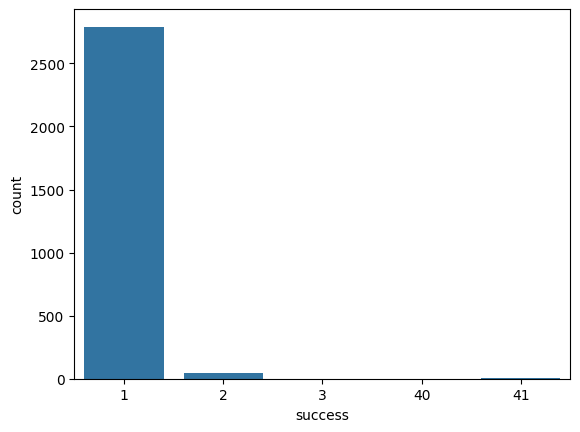

In [22]:
sns.countplot(x=success_counts)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [24]:
success_counts_comp = full_ds.loc[(full_ds.success) & (full_ds.platform == 'computer')]
success_counts_comp

,client,success,platform,time,premium,age
2,10931,True,computer,1585468629,False,28
5,32167,True,computer,1585457972,False,42
7,71087,True,computer,1585458446,False,36
10,39975,True,computer,1585428343,False,69
11,99308,True,computer,1585409409,True,38
...,...,...,...,...,...,...
3424,16540,True,computer,1585456144,False,49
3431,85769,True,computer,1585447052,False,46
3432,81031,True,computer,1585401631,False,45
3434,92584,True,computer,1585408896,False,28


<Axes: xlabel='age', ylabel='count'>

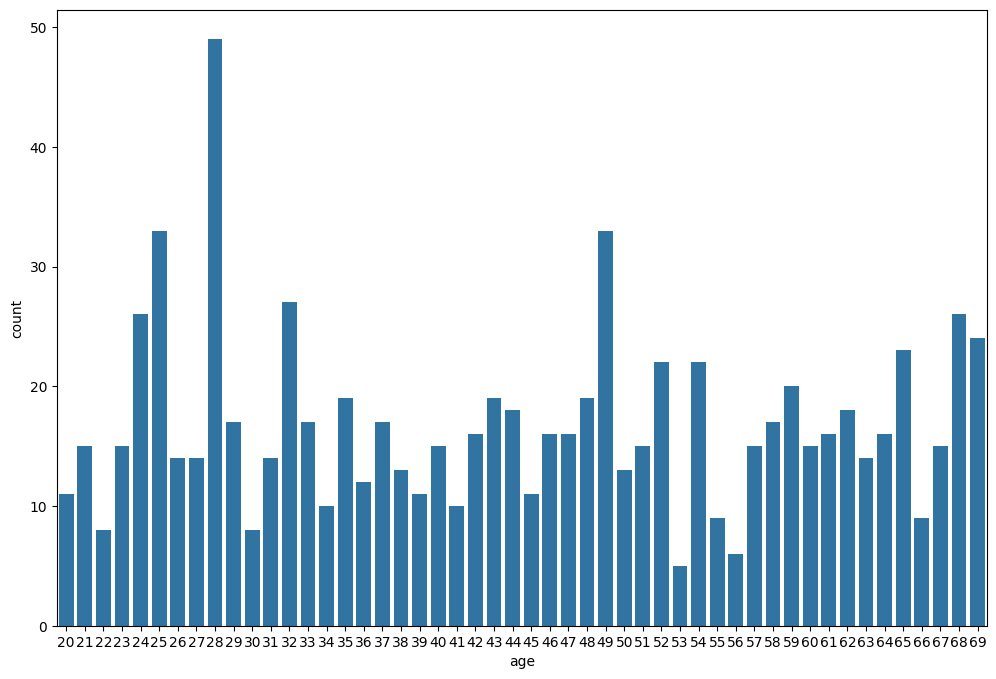

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data = success_counts_comp, x = 'age')